In [199]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [200]:
df = pd.read_csv('/content/Country-data.csv')

# Exploratory Data Analysis

In [201]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There are no null values in this dataset

In [203]:
country_name = pd.DataFrame(df.iloc[:, 0])
country_data = pd.DataFrame(df.iloc[:, 1:])
feature_name = []
for i in range(country_data.shape[1]):
  feature_name.append(df.columns[i])

In [204]:
print(feature_name)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']


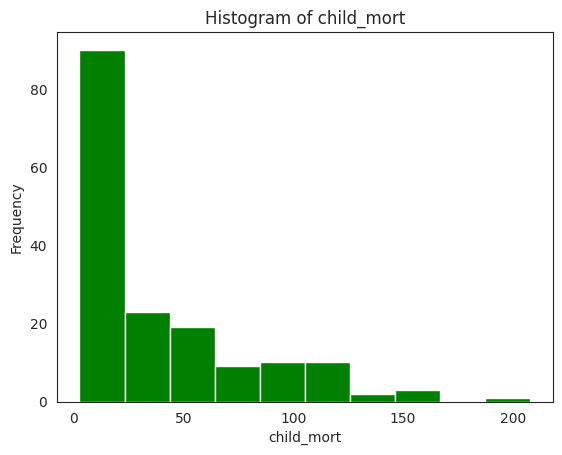

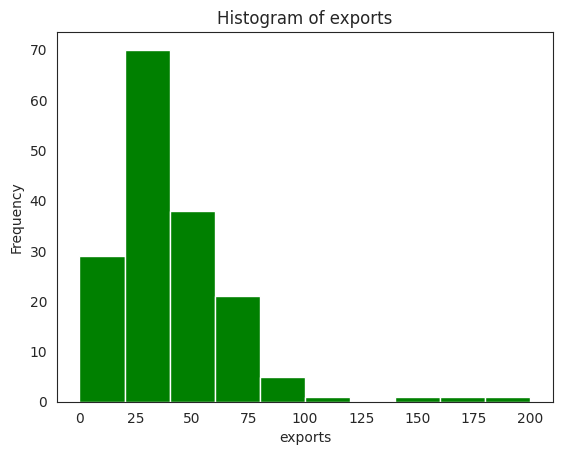

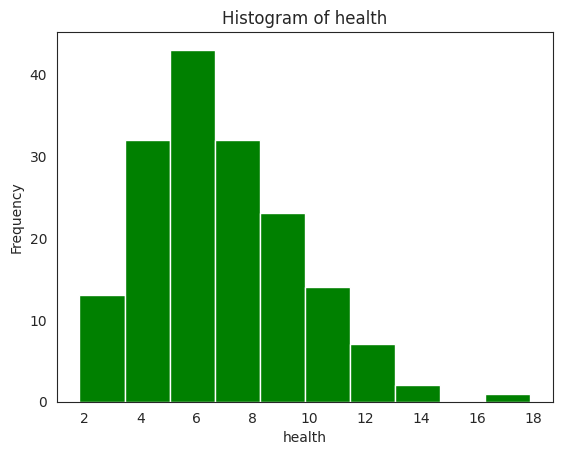

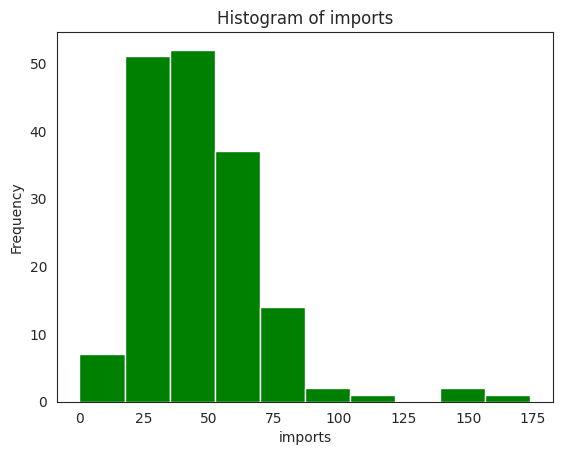

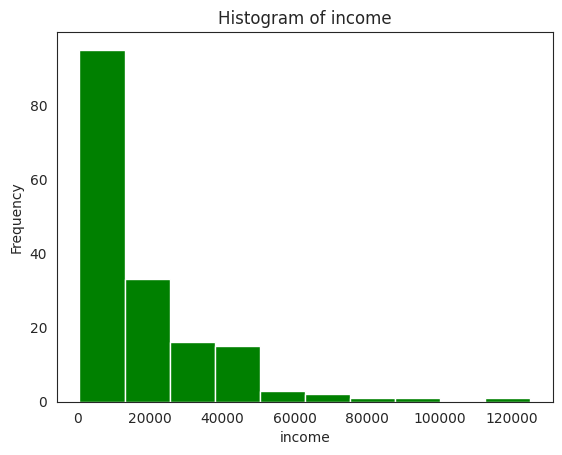

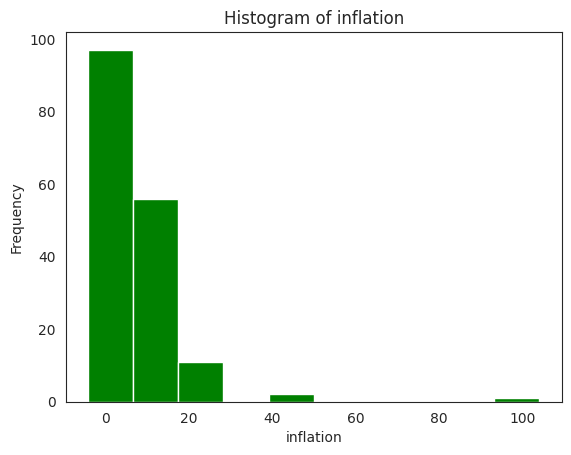

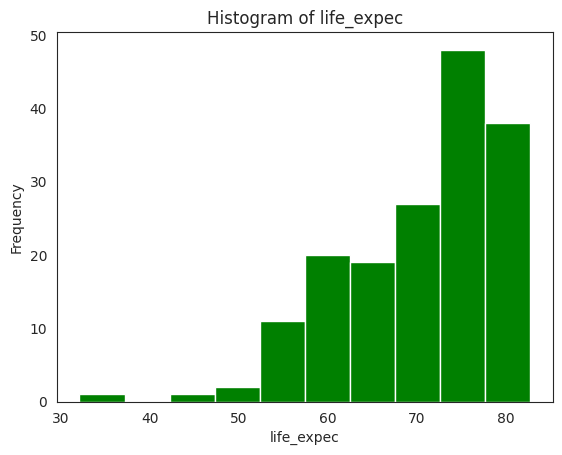

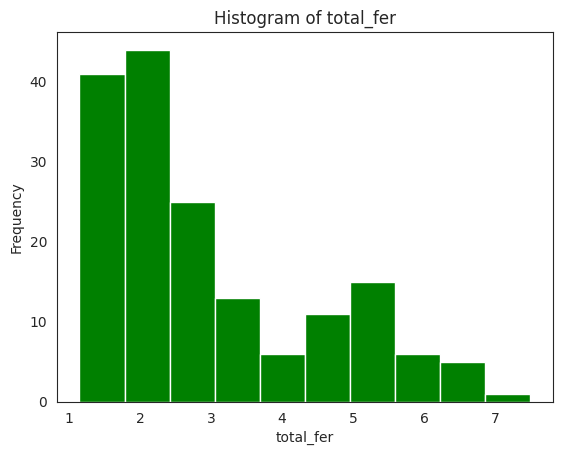

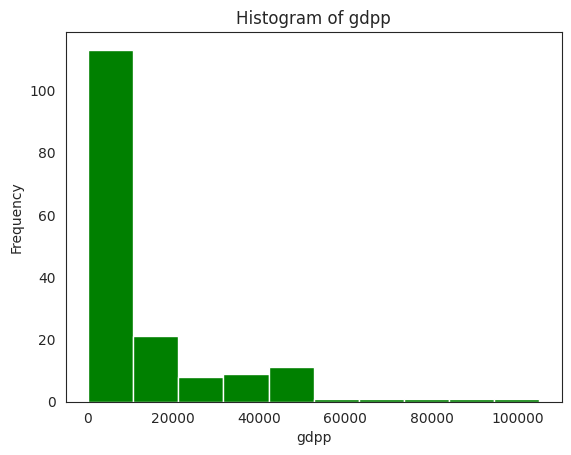

In [205]:
for column in country_data.columns:
    plt.hist(country_data[column], color='green')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [206]:
scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data)

# Dimensionality Reduction


In [207]:
pca = PCA()
country_data_pca = pca.fit_transform(country_data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


As we can see, the first 5 components are able to explain most of the variance of this data, therefore we will retain the first 5 principal components.

In [208]:
num_components = 5
variance_retained = 0
for i in range(5):
  variance_retained += explained_variance_ratio[i]
print(variance_retained)

0.9453099756439513


Variance retained = 94.53%

In [209]:
num_pca_components = 5
pca = PCA(n_components = num_pca_components)  # We are retaining only 5 principal components
country_data_pca = pca.fit_transform(country_data_scaled)

print(country_data_pca.shape)

(167, 5)


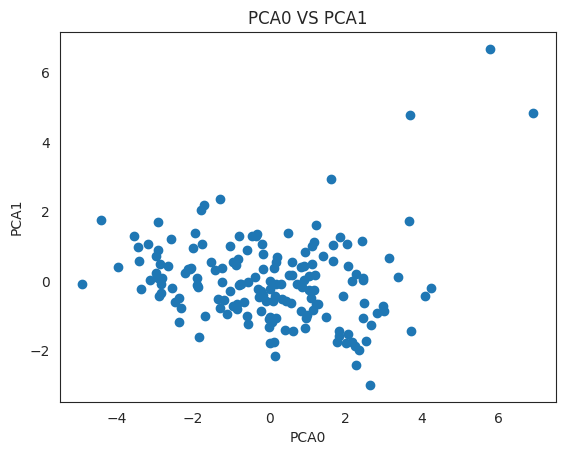

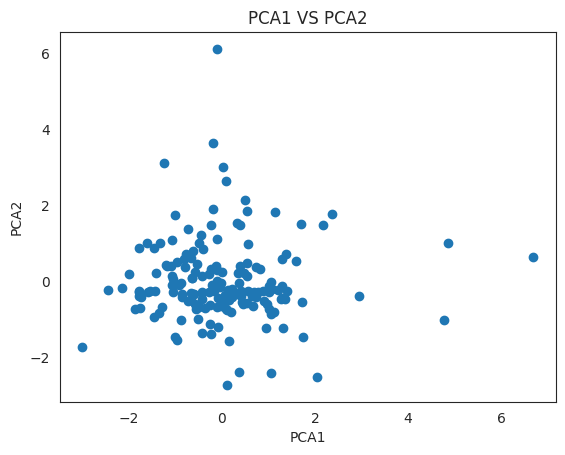

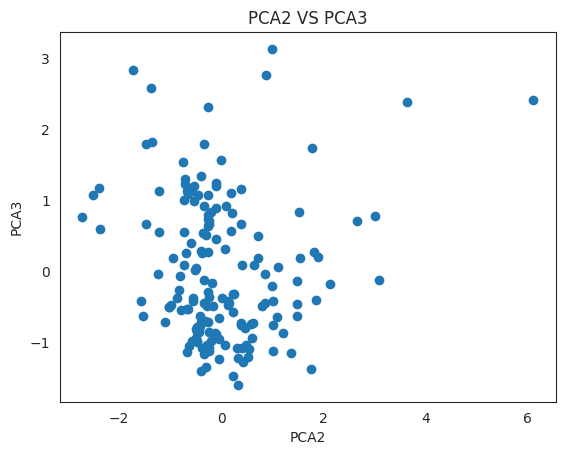

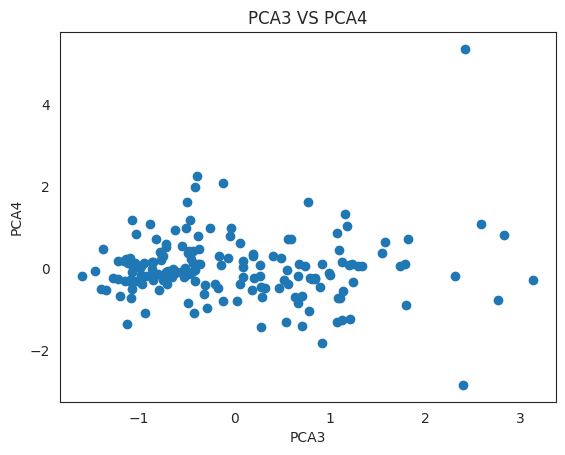

In [210]:
for i in range(country_data_pca.shape[1] - 1):
  plt.scatter(country_data_pca[:, i], country_data_pca[:, i+1])
  plt.title(f'PCA{i} VS PCA{i+1}')
  plt.xlabel(f'PCA{i}')
  plt.ylabel(f'PCA{i+1}')
  plt.show()

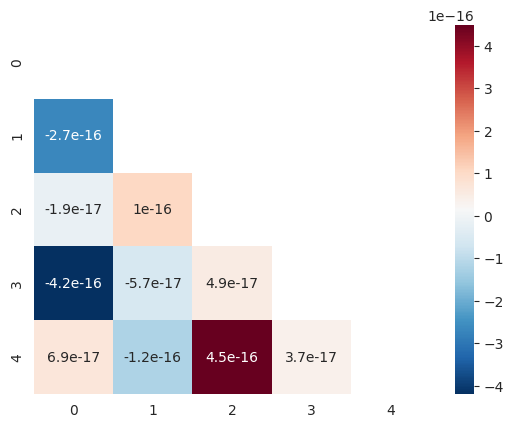

In [211]:
corr = pd.DataFrame(country_data_pca).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure()
sns.set_style(style = 'white')
sns.heatmap(corr, cmap= 'RdBu_r', xticklabels = corr.index, yticklabels = corr.columns, annot= True, mask = mask)
plt.show()

# K-means Clustering

In [212]:
Variance_with_k = []
num_k = 10
for i in range(1, num_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20)
    kmeans.fit(country_data_pca)
    Variance_with_k.append(kmeans.inertia_)

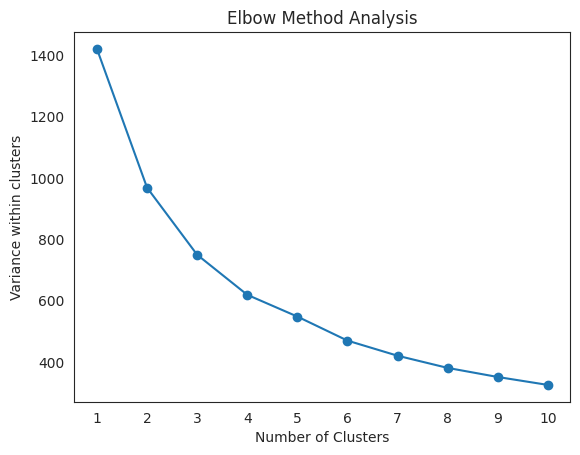

In [213]:
plt.plot(range(1, num_k + 1), Variance_with_k, marker='o')
plt.title('Elbow Method Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance within clusters')
plt.xticks(range(1, num_k + 1))
plt.show()

In [214]:
print(Variance_with_k)

[1420.8008933928581, 968.4663525507136, 749.6189390258883, 619.0559448324118, 548.1158500137371, 469.7033182160026, 420.44018937460544, 380.7144211521823, 351.0848001957874, 325.23265972241677]


The Elbow method analysis shows that the number of clusters should be 4 , as we can see the steepest reduction in variance with 4 clusters and then there is a gradual decrease.

In [215]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhoutte_Score = []
num_k = 20
for i in range(2, num_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20)
    kmeans.fit(country_data_pca)
    Silhoutte_Score.append(silhouette_score(country_data_pca, kmeans.labels_))

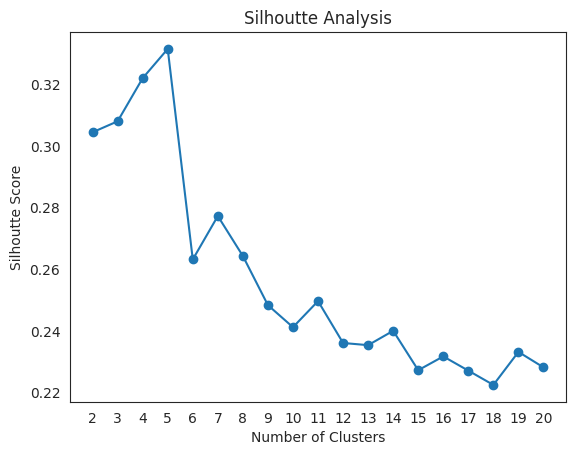

In [216]:
plt.plot(range(2, num_k + 1), Silhoutte_Score, marker='o')
plt.title('Silhoutte Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.xticks(range(2, num_k + 1))
plt.show()

The Silhoutte analysis confirms our Elbow analysis conclusions. This shows a peak at 4 and remains pretty high at 3, therefore we will take 3 clusters in our analysis.

In [217]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, init='k-means++', max_iter=500, n_init=20)
kmeans.fit(country_data_pca)
labels = kmeans.labels_
unique_labels = set(labels)

In [218]:
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [219]:
feature_name

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer']

In [220]:
def plot_scatter(feature1, feature2, labels, df, title):

    for cluster in unique_labels:
        indices = labels == cluster
        plt.scatter(df.loc[indices, feature1], df.loc[indices, feature2], label=f'Cluster {cluster}')

    plt.title(f'Scatter Plot: {title}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.grid(True)

    plt.show()

In [221]:
print(len(df.loc[labels == 0, 'income']))
print(len(df.loc[labels == 1, 'income']))
print(len(df.loc[labels == 2, 'income']))

47
84
36


In [222]:
scatter_plot_types = {
    'Child Mortality vs. Income': ('child_mort', 'income'),
    'Child Mortality vs. Total Fertinity': ('child_mort', 'total_fer'),
    'Child Mortality vs. Health': ('child_mort', 'health'),
    'Income vs. Life Expectancy': ('income', 'life_expec'),
    'Income vs. Health': ('income', 'health'),
    'Life Expectancy vs. Health': ('life_expec', 'health'),
    'Exports vs. Imports': ('exports', 'imports'),
    'Inflation vs. Life Expectancy': ('inflation', 'life_expec'),
    'Inflation vs. Child Mortality': ('inflation', 'child_mort'),
    'Total Fertility vs. Health': ('total_fer', 'health'),
}

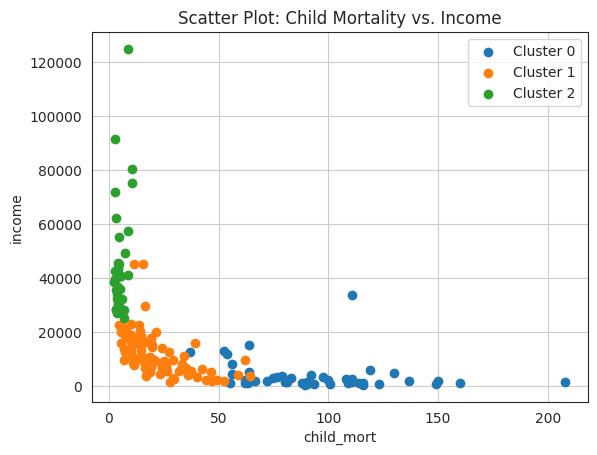

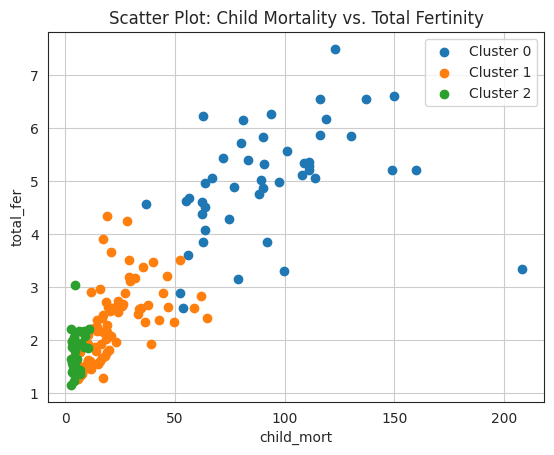

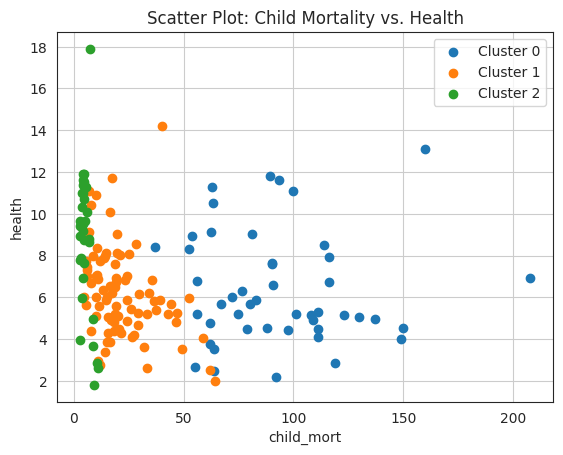

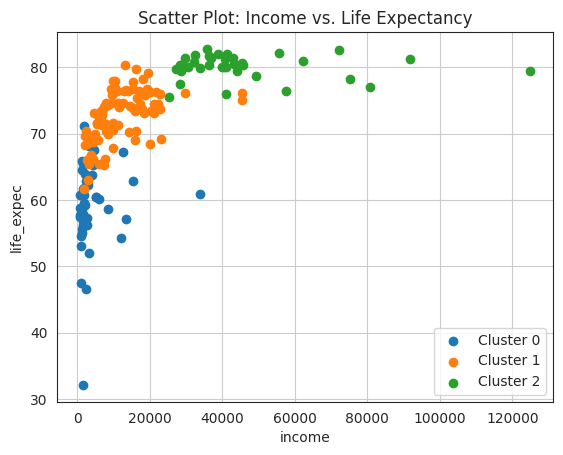

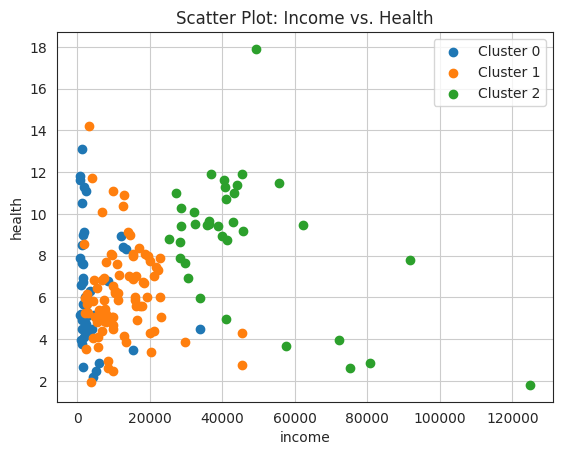

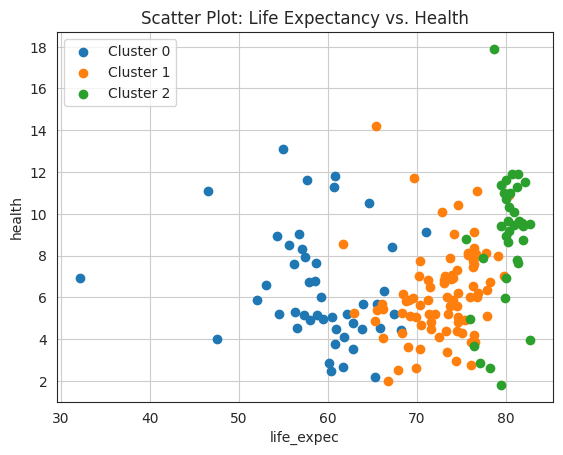

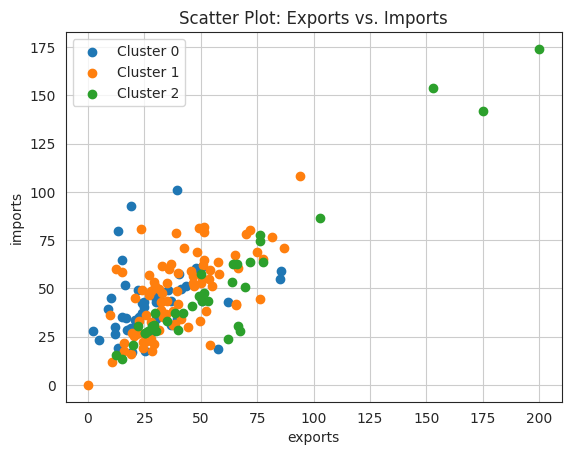

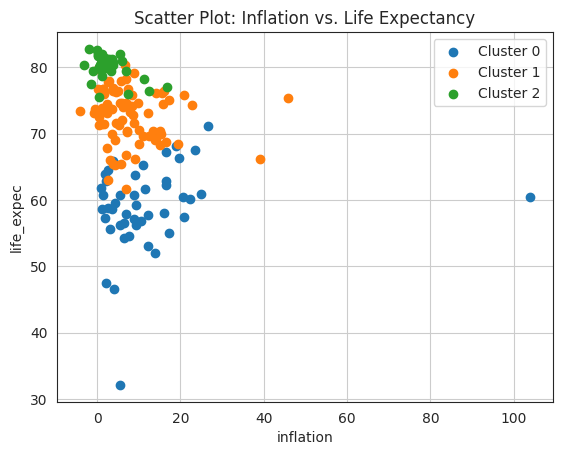

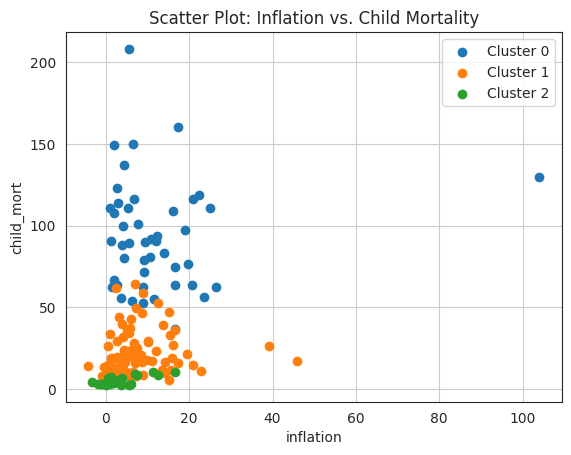

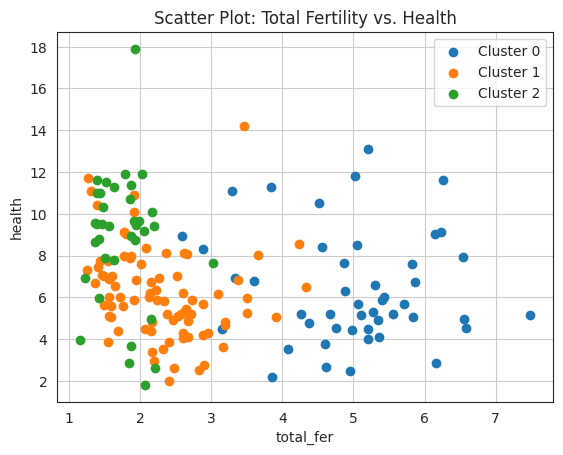

In [223]:
for title, (f1, f2) in scatter_plot_types.items():
    plot_scatter(f1, f2, labels, df, title)

In [229]:
for cluster in unique_labels:
      indices = labels == cluster
      print(f'Cluster {cluster}')
      print(df.loc[indices, 'country'].values)

Cluster 0
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster 1
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Jordan' 'Kazakhst